In [1]:
# We use 'Numpy'for mathematical operations on large, multi-dimensional arrays and matrices
# 'Pandas' is used for data manipulation and analysis
import numpy as np
import pandas as pd 

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# 'Os' module provides functions for interacting with the operating system 
import os


In [2]:
# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# read csv file using pandas
df_property = pd.read_csv('../input/ames-housing-dataset/AmesHousing.csv')
#../input/ames-housing-dataset/AmesHousing.csv
# display the top 5 rows of the dataframe
df_property.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.000,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.000,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.000,Unf,0.000,441.000,1080.000,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.000,0.000,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.000,Fin,2.000,528.000,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.000,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.000,Gd,TA,CBlock,TA,TA,No,ALQ,1065.000,Unf,0.000,1045.000,2110.000,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.000,0.000,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.000,Fin,2.000,522.000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# 'shape' function returns a tuple that gives the total number of rows and columns in the data
df_property.shape

(2930, 82)

In [6]:
df_property.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [7]:
df_property['Fireplaces'] = df_property['Fireplaces'].astype('O')
df_property['Kitchen AbvGr'] = df_property['Kitchen AbvGr'].astype('O')
df_property['Bedroom AbvGr'] = df_property['Bedroom AbvGr'].astype('O')
df_property['Half Bath'] = df_property['Half Bath'].astype('O')
df_property['Bsmt Half Bath'] = df_property['Bsmt Half Bath'].astype('O')
df_property['Bsmt Full Bath'] = df_property['Bsmt Full Bath'].astype('O')
df_property['Overall Cond'] = df_property['Overall Cond'].astype('O')
df_property['Overall Qual'] = df_property['Overall Qual'].astype('O')

In [8]:
df_property.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual        object
Overall Cond        object
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [9]:
# 'dtypes' provides the data type for each column
df_property[['Garage Cars', 'Fireplaces', 'Kitchen AbvGr', 'Bedroom AbvGr', 'Half Bath', 'Full Bath', 'Bsmt Half Bath','Bsmt Full Bath', 'Overall Cond', 'Overall Qual']].dtypes

Garage Cars       float64
Fireplaces         object
Kitchen AbvGr      object
Bedroom AbvGr      object
Half Bath          object
Full Bath           int64
Bsmt Half Bath     object
Bsmt Full Bath     object
Overall Cond       object
Overall Qual       object
dtype: object

In [10]:
df_property.drop(['Order'], axis=1, inplace=True)

In [11]:
df_property.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [12]:
# For Statistical summary of numerical variable

df_property.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000,2930.000,2440.000,2930.000,2930.000,2930.000,2907.000,2929.000,2929.000,2929.000,2929.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2771.000,2929.000,2929.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000
mean,714464496.989,57.387,69.225,10147.922,1971.356,1984.267,101.897,442.630,49.722,559.263,1051.615,1159.558,335.456,4.677,1499.690,1.567,6.443,1978.132,1.767,472.820,93.752,47.533,23.012,2.592,16.002,2.243,50.635,6.216,2007.790,180796.060
std,188730844.649,42.638,23.365,7880.018,30.245,20.860,179.113,455.591,169.168,439.494,440.615,391.891,428.396,46.311,505.509,0.553,1.573,25.528,0.761,215.047,126.362,67.483,64.139,25.141,56.087,35.597,566.344,2.714,1.317,79886.692
min,526301100.000,20.000,21.000,1300.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,2.000,1895.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,12789.000
25%,528477022.500,20.000,58.000,7440.250,1954.000,1965.000,0.000,0.000,0.000,219.000,793.000,876.250,0.000,0.000,1126.000,1.000,5.000,1960.000,1.000,320.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000,129500.000
50%,535453620.000,50.000,68.000,9436.500,1973.000,1993.000,0.000,370.000,0.000,466.000,990.000,1084.000,0.000,0.000,1442.000,2.000,6.000,1979.000,2.000,480.000,0.000,27.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,160000.000
75%,907181097.500,70.000,80.000,11555.250,2001.000,2004.000,164.000,734.000,0.000,802.000,1302.000,1384.000,703.750,0.000,1742.750,2.000,7.000,2002.000,2.000,576.000,168.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,213500.000
max,1007100110.000,190.000,313.000,215245.000,2010.000,2010.000,1600.000,5644.000,1526.000,2336.000,6110.000,5095.000,2065.000,1064.000,5642.000,4.000,15.000,2207.000,5.000,1488.000,1424.000,742.000,1012.000,508.000,576.000,800.000,17000.000,12.000,2010.000,755000.000


In [13]:
# summary of categorical variables
df_property.describe(include = object)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Bsmt Full Bath,Bsmt Half Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2907,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2928.000,2928.000,2930,2930,2930,2930,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,10,9,6,8,16,17,5,4,5,6,5,5,4,6,6,6,5,2,5,4.000,3.000,3,8,4,5,8,5,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0.000,0.000,0,3,1,TA,Typ,0,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,825,1654,2321,2887,1026,1015,1752,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1707.000,2753.000,1843,1597,2796,1494,2728,1422,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [14]:
# use drop() to drop the redundant variables
# 'axis = 1' drops the corresponding columns
df_property = df_property.drop(['Pool QC', 'Pool Area', 'Garage Yr Blt'], axis= 1)

# re-check the shape of the dataframe
df_property.shape

(2930, 78)

In [15]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number is used to select the numeric features
df_numeric_features = df_property.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object')

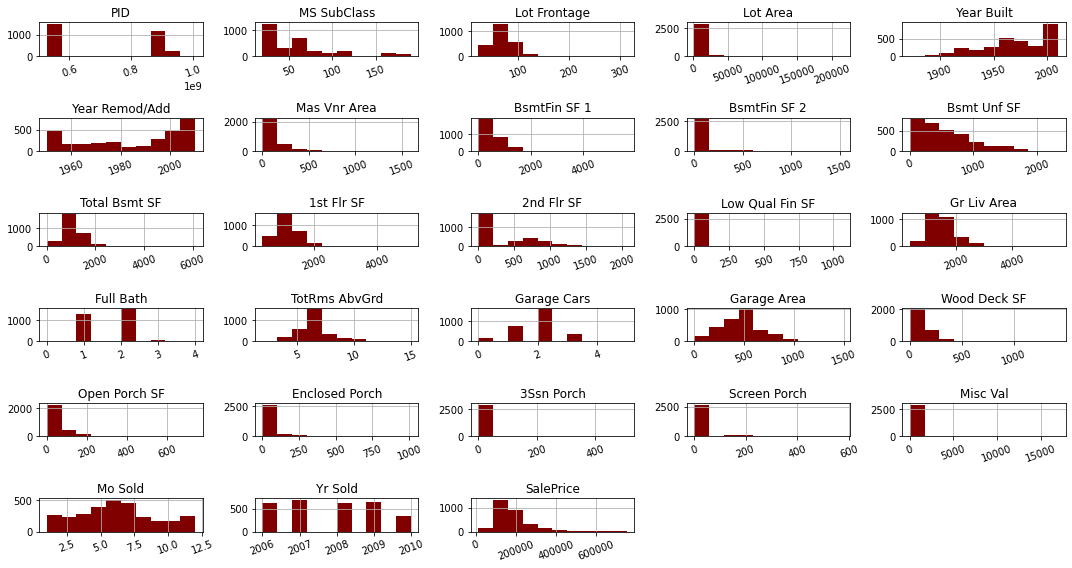

In [16]:
# plot the histogram of numeric variables
# hist() by default considers the numeric variables only, 
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df_property.hist(xrot = 20, color = "maroon")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

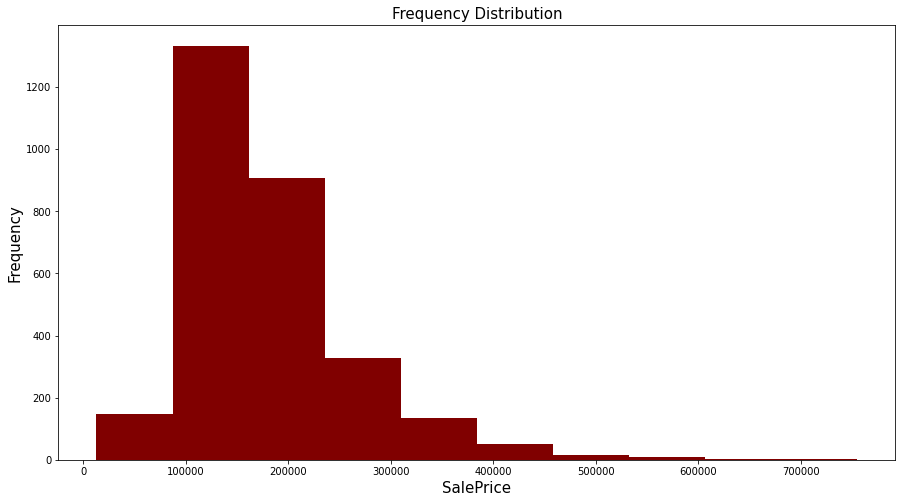

In [17]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("SalePrice", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df_property["SalePrice"], color = 'maroon')
plt.show()

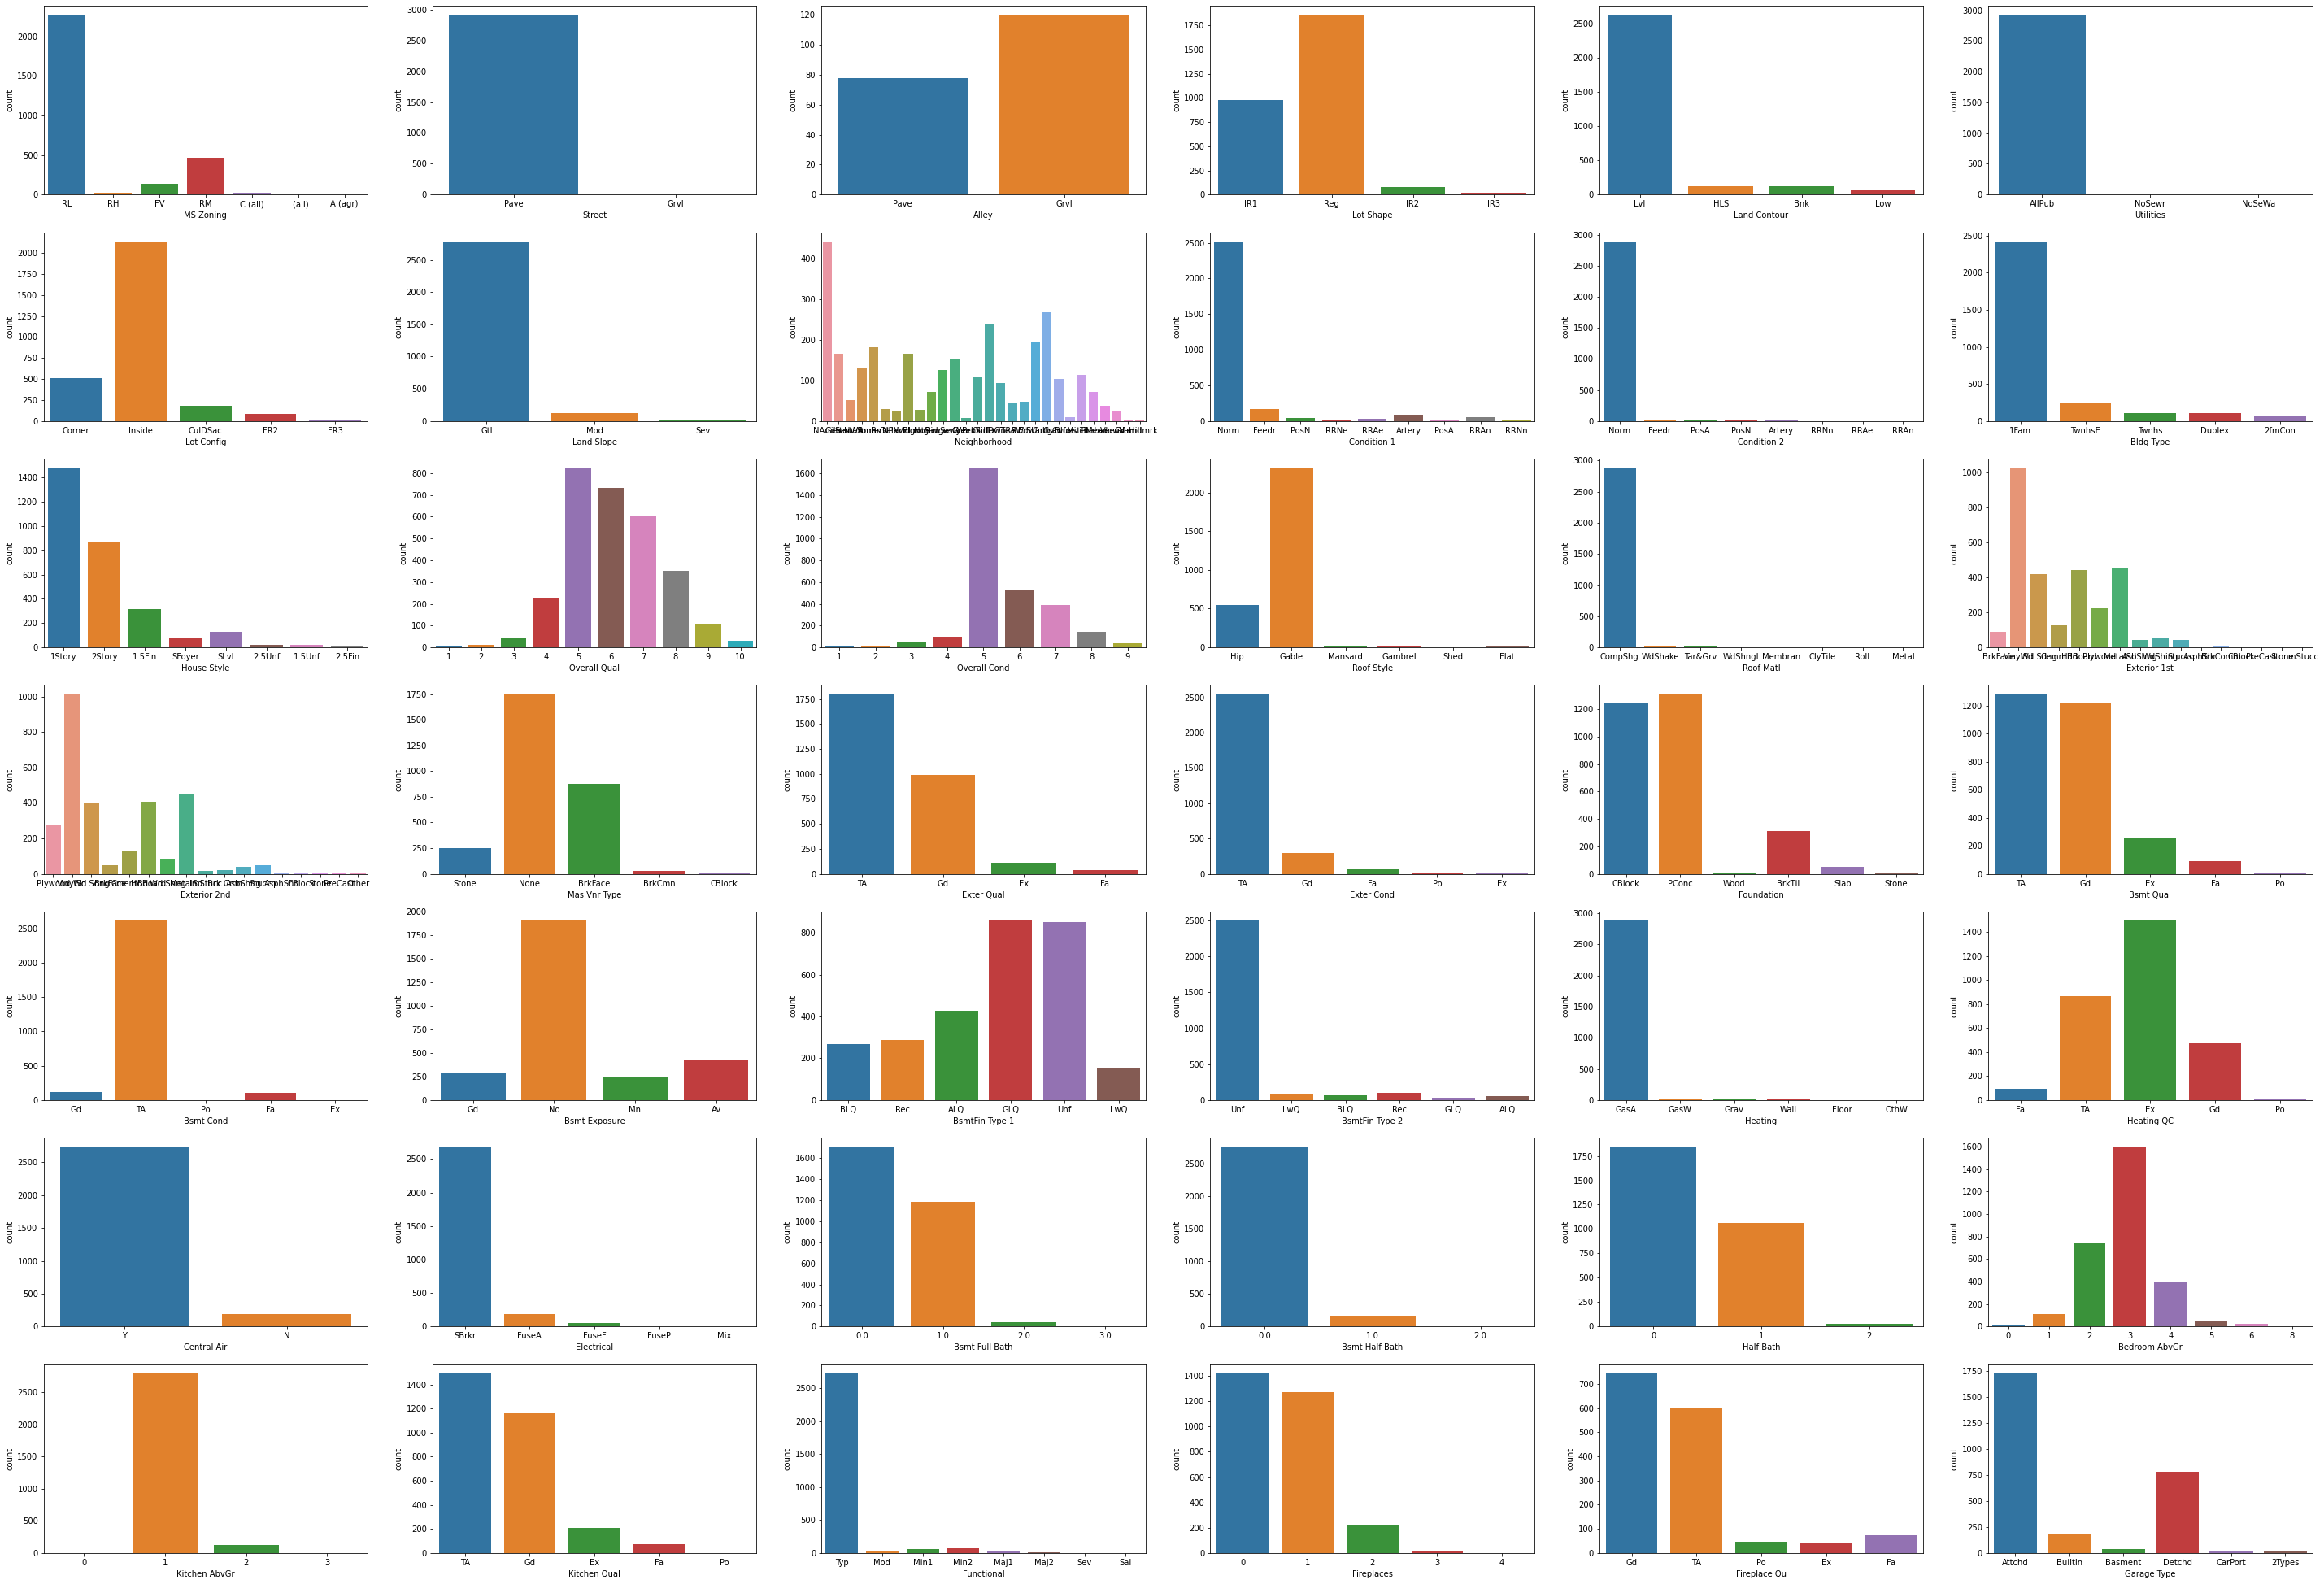

In [18]:
# create an empty list to store all the categorical variables
categorical=[]

# check the data type of each variable
for column in df_property:

    # check if the variable has the categorical type 
    if is_string_dtype(df_property[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=7, ncols=6, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_property[variable], ax = subplot)
    
# display the plot
plt.show()

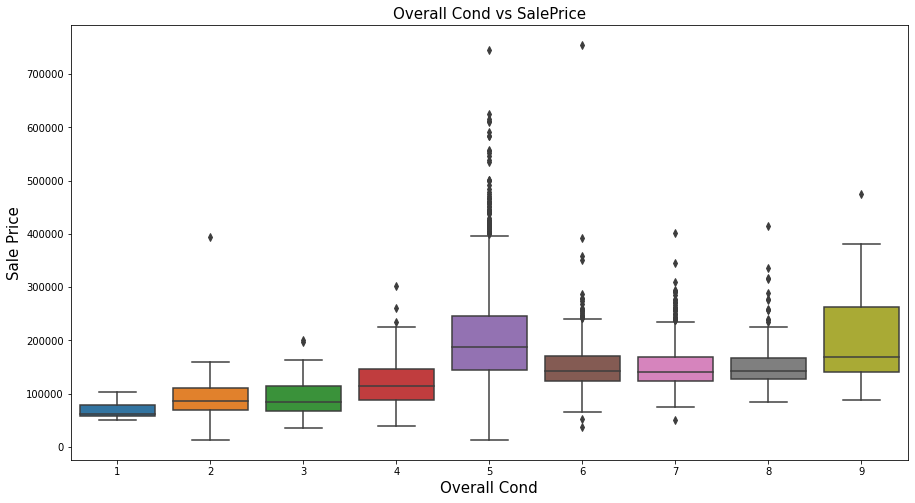

In [19]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="SalePrice", x="Overall Cond", data= df_property)

# set the title of the plot and the fontsize
plt.title("Overall Cond vs SalePrice", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Cond", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

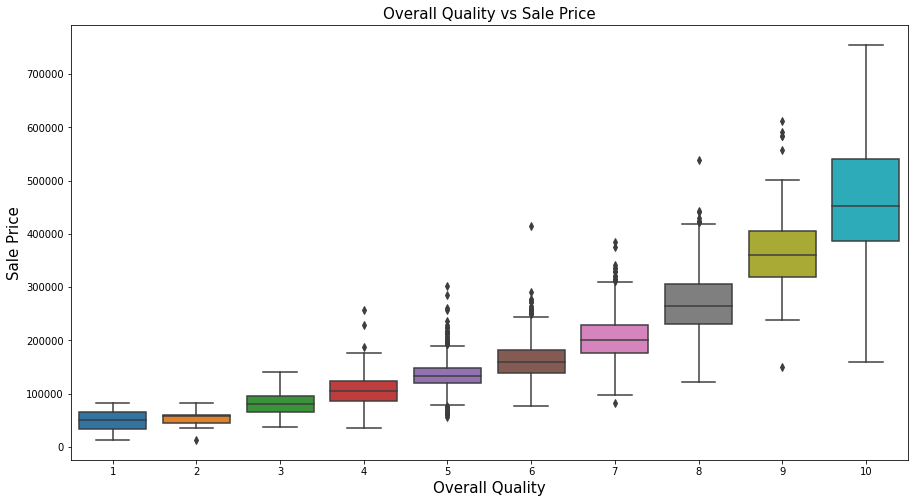

In [20]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="SalePrice", x="Overall Qual", data= df_property)

# set the title of the plot and the fontsize
plt.title("Overall Quality vs Sale Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Quality", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

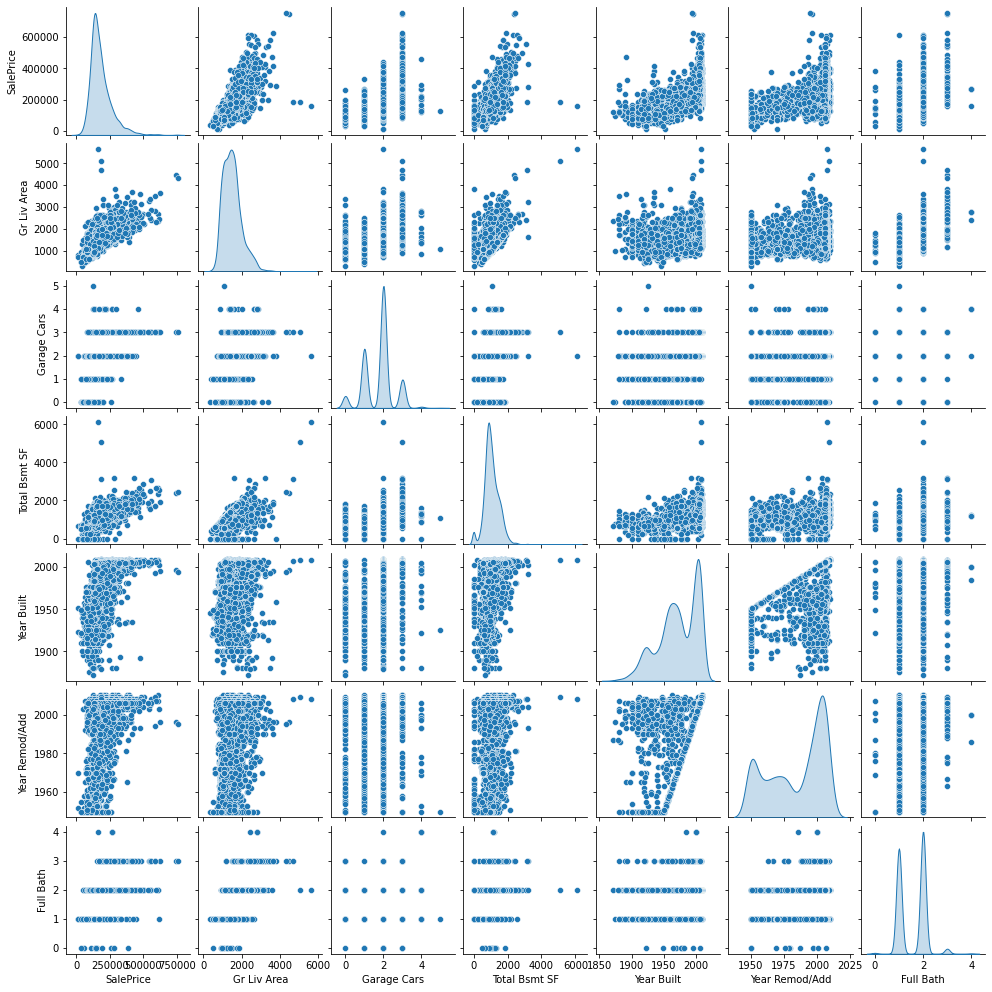

In [21]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["SalePrice", "Gr Liv Area" ,"Garage Cars", "Total Bsmt SF", "Year Built", "Year Remod/Add","Full Bath"]
         
# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df_property[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

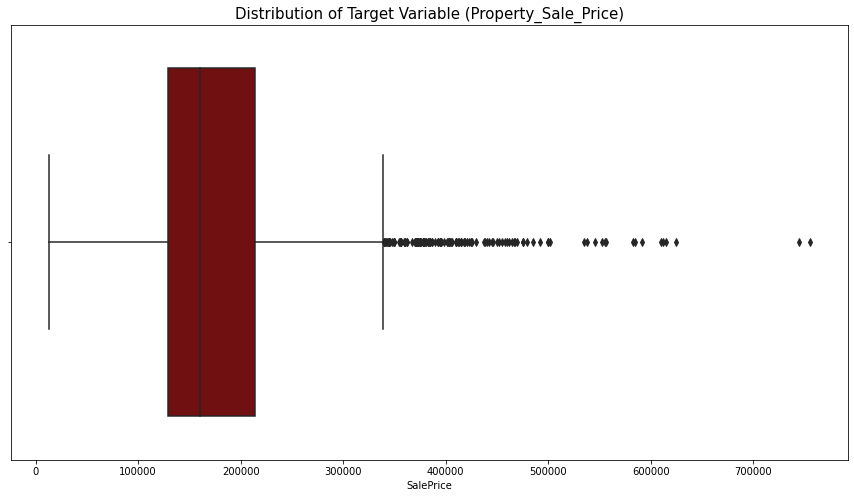

In [22]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df_property['SalePrice'], color='maroon')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

# display the plot
plt.show()

In [23]:
# remove the observations with the house price greater than or equal to 500000
df_property = df_property[df_property['SalePrice'] < 500000]

# check the dimension of the data
df_property.shape

(2912, 78)

In [24]:
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False': sorts values in the descending order
total_nulls = df_property.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
percent_null = (df_property.isnull().sum()*100/df_property.isnull().count())  
percent_null = percent_null.sort_values(ascending = False) 

# concat the 'total_nulls' and 'percent_null' columns
# 'axis = 1' stands for columns
missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_values['Data Type'] = df_property[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
Misc Feature,2806,96.360,object
Alley,2714,93.201,object
Fence,2341,80.391,object
Fireplace Qu,1422,48.832,object
Lot Frontage,490,16.827,float64
Garage Cond,159,5.460,object
Garage Finish,159,5.460,object
Garage Qual,159,5.460,object
Garage Type,157,5.391,object
Bsmt Exposure,83,2.850,object


In [25]:
# filter out the categorical variables and consider only the numeric variables with missing values
num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
Lot Frontage,490,16.827,float64
Mas Vnr Area,23,0.790,float64
Garage Cars,1,0.034,float64
Total Bsmt SF,1,0.034,float64
Bsmt Unf SF,1,0.034,float64
BsmtFin SF 2,1,0.034,float64
BsmtFin SF 1,1,0.034,float64
Garage Area,1,0.034,float64


In [26]:
# use the function fillna() to fill the missing values
df_property['Lot Frontage'] = df_property['Lot Frontage'].fillna(df_property['Lot Frontage'].median())

In [27]:
# use the function fillna() to fill the missing values
df_property['Mas Vnr Area'] = df_property['Mas Vnr Area'].fillna(df_property['Mas Vnr Area'].median())

In [28]:
# filter out the numerical variables and consider only the categorical variables with missing values
cat_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
Misc Feature,2806,96.360,object
Alley,2714,93.201,object
Fence,2341,80.391,object
Fireplace Qu,1422,48.832,object
Garage Cond,159,5.460,object
Garage Finish,159,5.460,object
Garage Qual,159,5.460,object
Garage Type,157,5.391,object
Bsmt Exposure,83,2.850,object
BsmtFin Type 2,81,2.782,object


In [29]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'MiscFeature' with a valid value, 'None'
df_property['Misc Feature'] = df_property['Misc Feature'].fillna('None')

# replace NA values in 'Alley' with a valid value, 'No alley access' 
df_property['Alley'] = df_property['Alley'].fillna('No alley access')

# replace NA values in 'Fence' with a valid value, 'No Fence'
df_property['Fence'] = df_property['Fence'].fillna('No Fence')

# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
df_property['Fireplace Qu'] = df_property['Fireplace Qu'].fillna('No Fireplace')

In [30]:
# replace the missing values in the categoric variables representing the garage by `No Garage`
for col in ['Garage Type', 'Garage Finish', 'Garage Cond', 'Garage Qual']:
    df_property[col].fillna('No Garage', inplace = True)

In [31]:
# according to the data definition, 'NA' denotes the absence of basement in the variabels 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
# replace the missing values in the categoric variables representing the basement by `No Basement`
for col in ['BsmtFin Type 2', 'Bsmt Exposure', 'Bsmt Qual','Bsmt Cond','BsmtFin Type 1']:
    df_property[col].fillna('No Basement', inplace = True)

In [32]:
# according to the data definition, 'NA' denotes the absence of masonry veneer
# replace the missing values in the categorical variable 'MasVnrType' with a value, 'None'
df_property['Mas Vnr Type'] = df_property['Mas Vnr Type'].fillna('None')

In [33]:
# replace the missing values in the categorical variable 'Electrical' with its mode
mode_electrical = df_property['Electrical'].mode()
df_property['Electrical'].fillna(mode_electrical[0] , inplace = True)

In [34]:
# filter out the categorical variables and consider only the numeric variables with missing values
num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
Lot Frontage,490,16.827,float64
Mas Vnr Area,23,0.790,float64
Garage Cars,1,0.034,float64
Total Bsmt SF,1,0.034,float64
Bsmt Unf SF,1,0.034,float64
BsmtFin SF 2,1,0.034,float64
BsmtFin SF 1,1,0.034,float64
Garage Area,1,0.034,float64


In [35]:

# use the function fillna() to fill the missing values
df_property['Lot Frontage'] = df_property['Lot Frontage'].fillna(0)

In [36]:
# filter out the categorical variables and consider only the numeric variables with missing values
num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
Lot Frontage,490,16.827,float64
Mas Vnr Area,23,0.790,float64
Garage Cars,1,0.034,float64
Total Bsmt SF,1,0.034,float64
Bsmt Unf SF,1,0.034,float64
BsmtFin SF 2,1,0.034,float64
BsmtFin SF 1,1,0.034,float64
Garage Area,1,0.034,float64


In [37]:
df_property.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       1
BsmtFin Type 2     0
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

In [38]:
df_property.drop(df_property.columns[df_property.isnull().sum()>0], axis = 1, inplace = True)

df_property.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.000,31770,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.000,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,TA,TA,P,210,62,0,0,0,No Fence,None,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.000,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,Unf,TA,TA,Y,140,0,0,0,120,MnPrv,None,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.000,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,Unf,TA,TA,Y,393,36,0,0,0,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.000,11160,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.000,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,2110,0,0,2110,2,1,3,1,Ex,8,Typ,2,TA,Attchd,Fin,TA,TA,Y,0,0,0,0,0,No Fence,None,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.000,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,TA,TA,Y,212,34,0,0,0,MnPrv,None,0,3,2010,WD,Normal,189900


In [39]:
df_property.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin Type 2     0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual 

In [40]:
df_property.shape

(2912, 70)

In [41]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df_property.corr()

# print the correlation matrix
corrmat

,PID,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000,-0.004,-0.082,0.044,-0.339,-0.152,-0.216,-0.129,0.003,0.056,-0.093,-0.165,-0.057,-0.045,-0.068,0.161,-0.026,-0.020,-0.009,-0.053,0.010,-0.236
MS SubClass,-0.004,1.000,-0.393,-0.205,0.040,0.046,0.013,-0.246,0.306,0.026,0.075,0.137,0.036,-0.017,-0.013,-0.024,-0.038,-0.049,-0.030,-0.001,-0.016,-0.080
Lot Frontage,-0.082,-0.393,1.000,0.367,0.109,0.082,0.192,0.415,0.015,0.006,0.338,0.158,0.317,0.095,0.147,0.015,0.026,0.068,0.036,0.016,-0.007,0.331
Lot Area,0.044,-0.205,0.367,1.000,0.015,0.014,0.100,0.324,0.021,0.002,0.272,0.115,0.204,0.149,0.101,0.025,0.017,0.038,0.071,0.005,-0.023,0.248
Year Built,-0.339,0.040,0.109,0.015,1.000,0.610,0.300,0.302,0.012,-0.144,0.232,0.467,0.100,0.227,0.196,-0.373,0.017,-0.049,-0.010,0.017,-0.014,0.577
Year Remod/Add,-0.152,0.046,0.082,0.014,0.610,1.000,0.182,0.233,0.158,-0.060,0.312,0.455,0.189,0.217,0.240,-0.219,0.038,-0.054,-0.003,0.021,0.032,0.553
Mas Vnr Area,-0.216,0.013,0.192,0.100,0.300,0.182,1.000,0.364,0.107,-0.058,0.371,0.239,0.254,0.148,0.136,-0.108,0.017,0.054,0.049,0.006,-0.017,0.459
1st Flr SF,-0.129,-0.246,0.415,0.324,0.302,0.233,0.364,1.000,-0.270,-0.011,0.547,0.363,0.374,0.220,0.235,-0.061,0.047,0.087,0.097,0.051,-0.017,0.603
2nd Flr SF,0.003,0.306,0.015,0.021,0.012,0.158,0.107,-0.270,1.000,0.019,0.653,0.394,0.584,0.075,0.187,0.058,-0.032,0.008,-0.005,0.014,-0.012,0.259
Low Qual Fin SF,0.056,0.026,0.006,0.002,-0.144,-0.060,-0.058,-0.011,0.019,1.000,0.102,-0.002,0.105,-0.015,-0.000,0.087,-0.005,0.008,-0.006,0.011,-0.002,-0.038


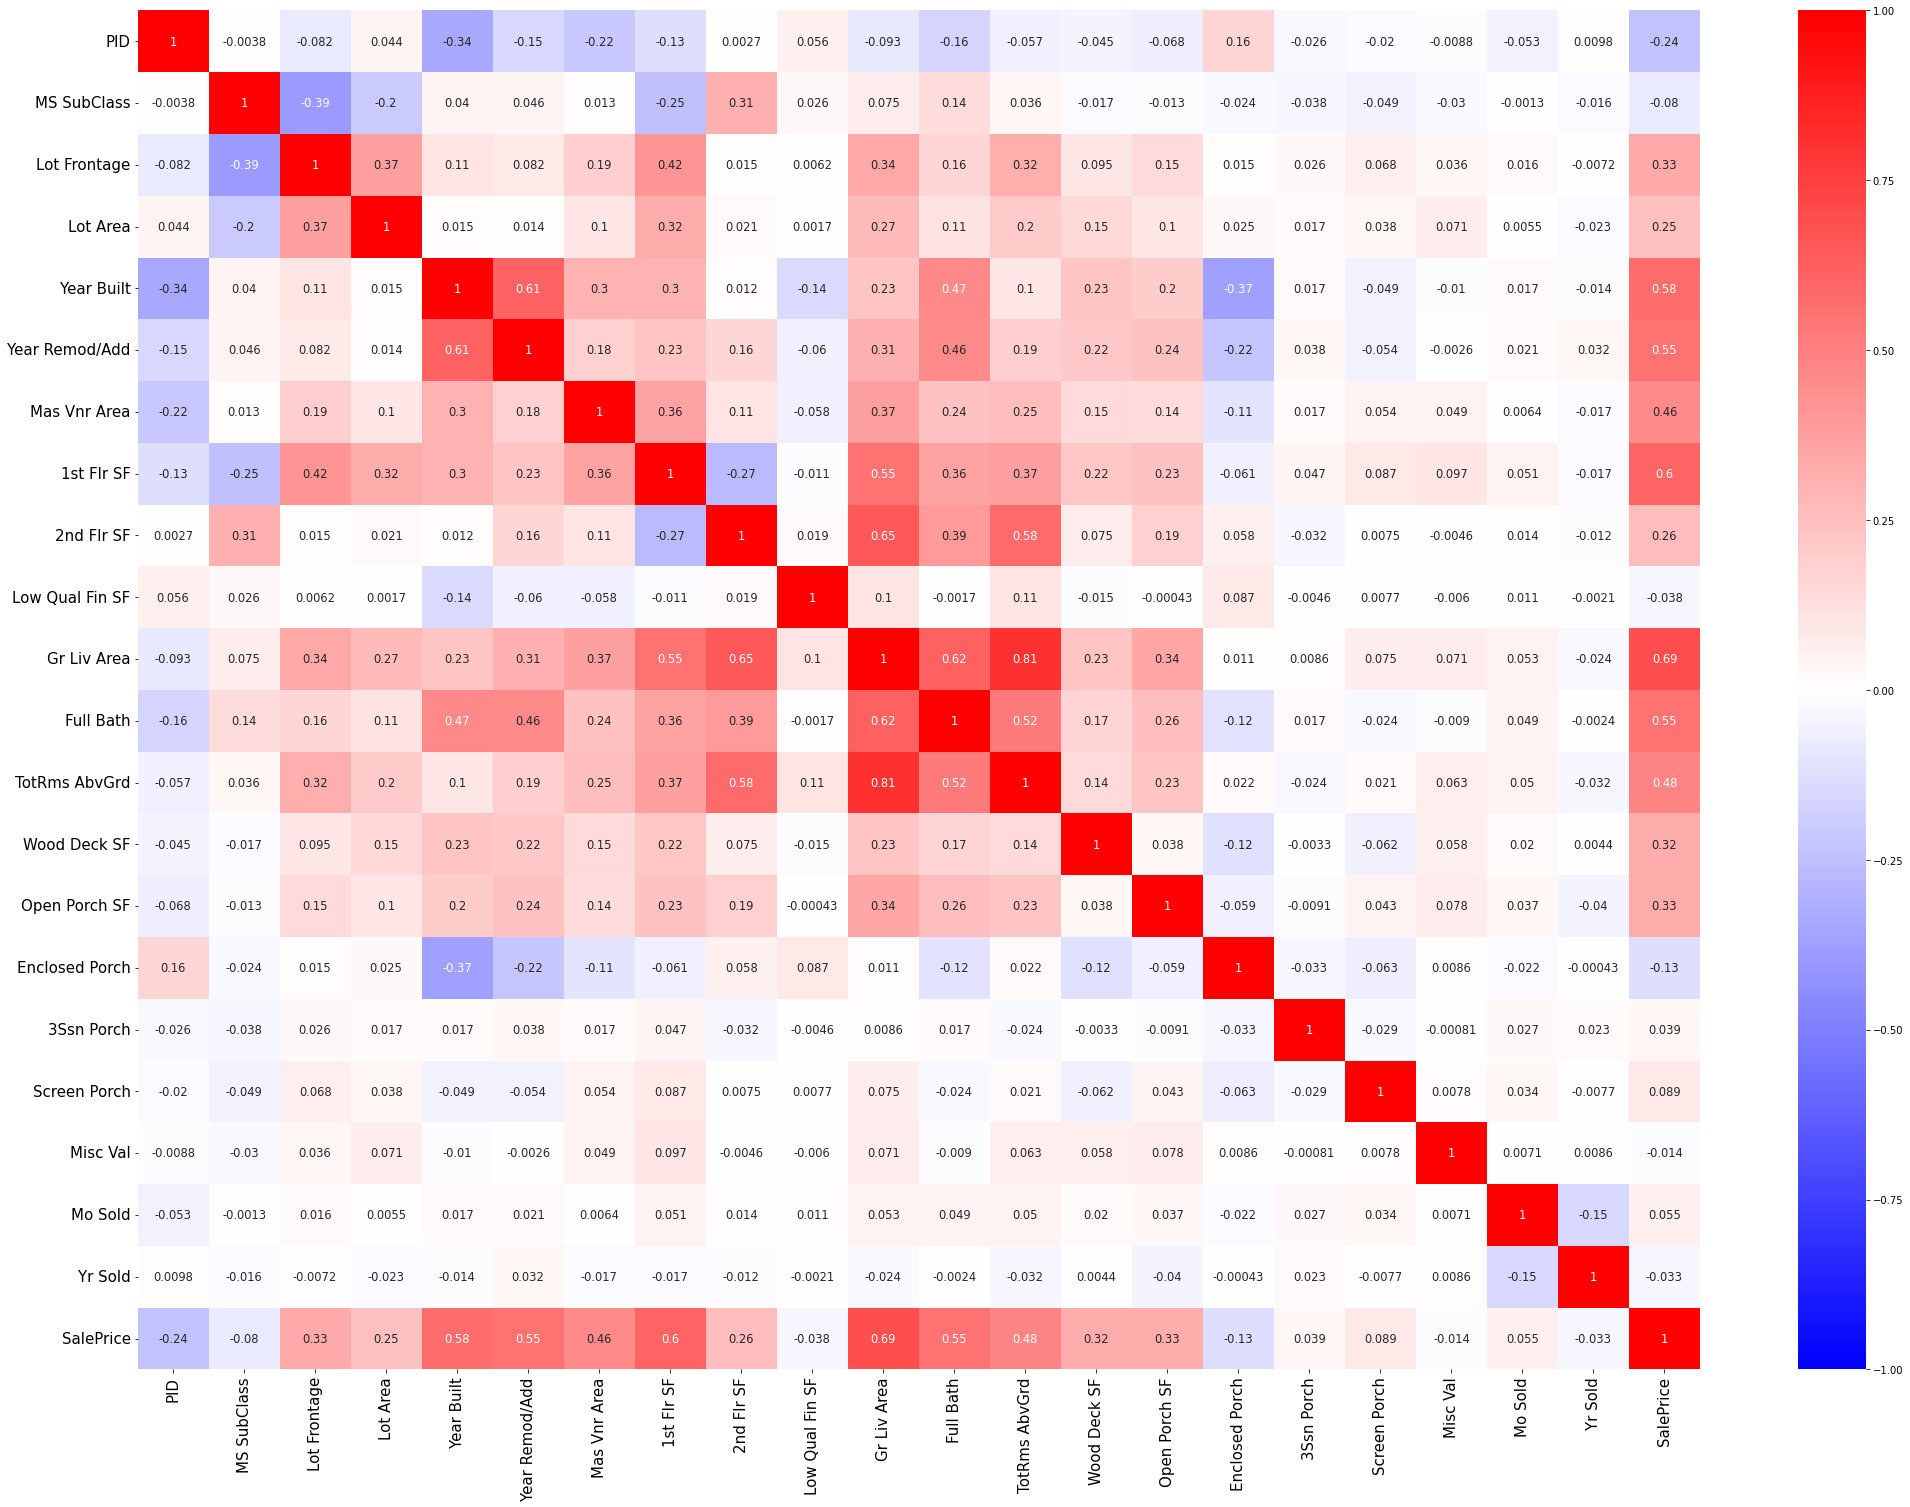

In [42]:
# set the plot size
plt.figure(figsize = (35,25))

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# annot_kws: sets the font size of the annotation
# annot: prints the correlation values in the chart
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
sns.heatmap(corrmat, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

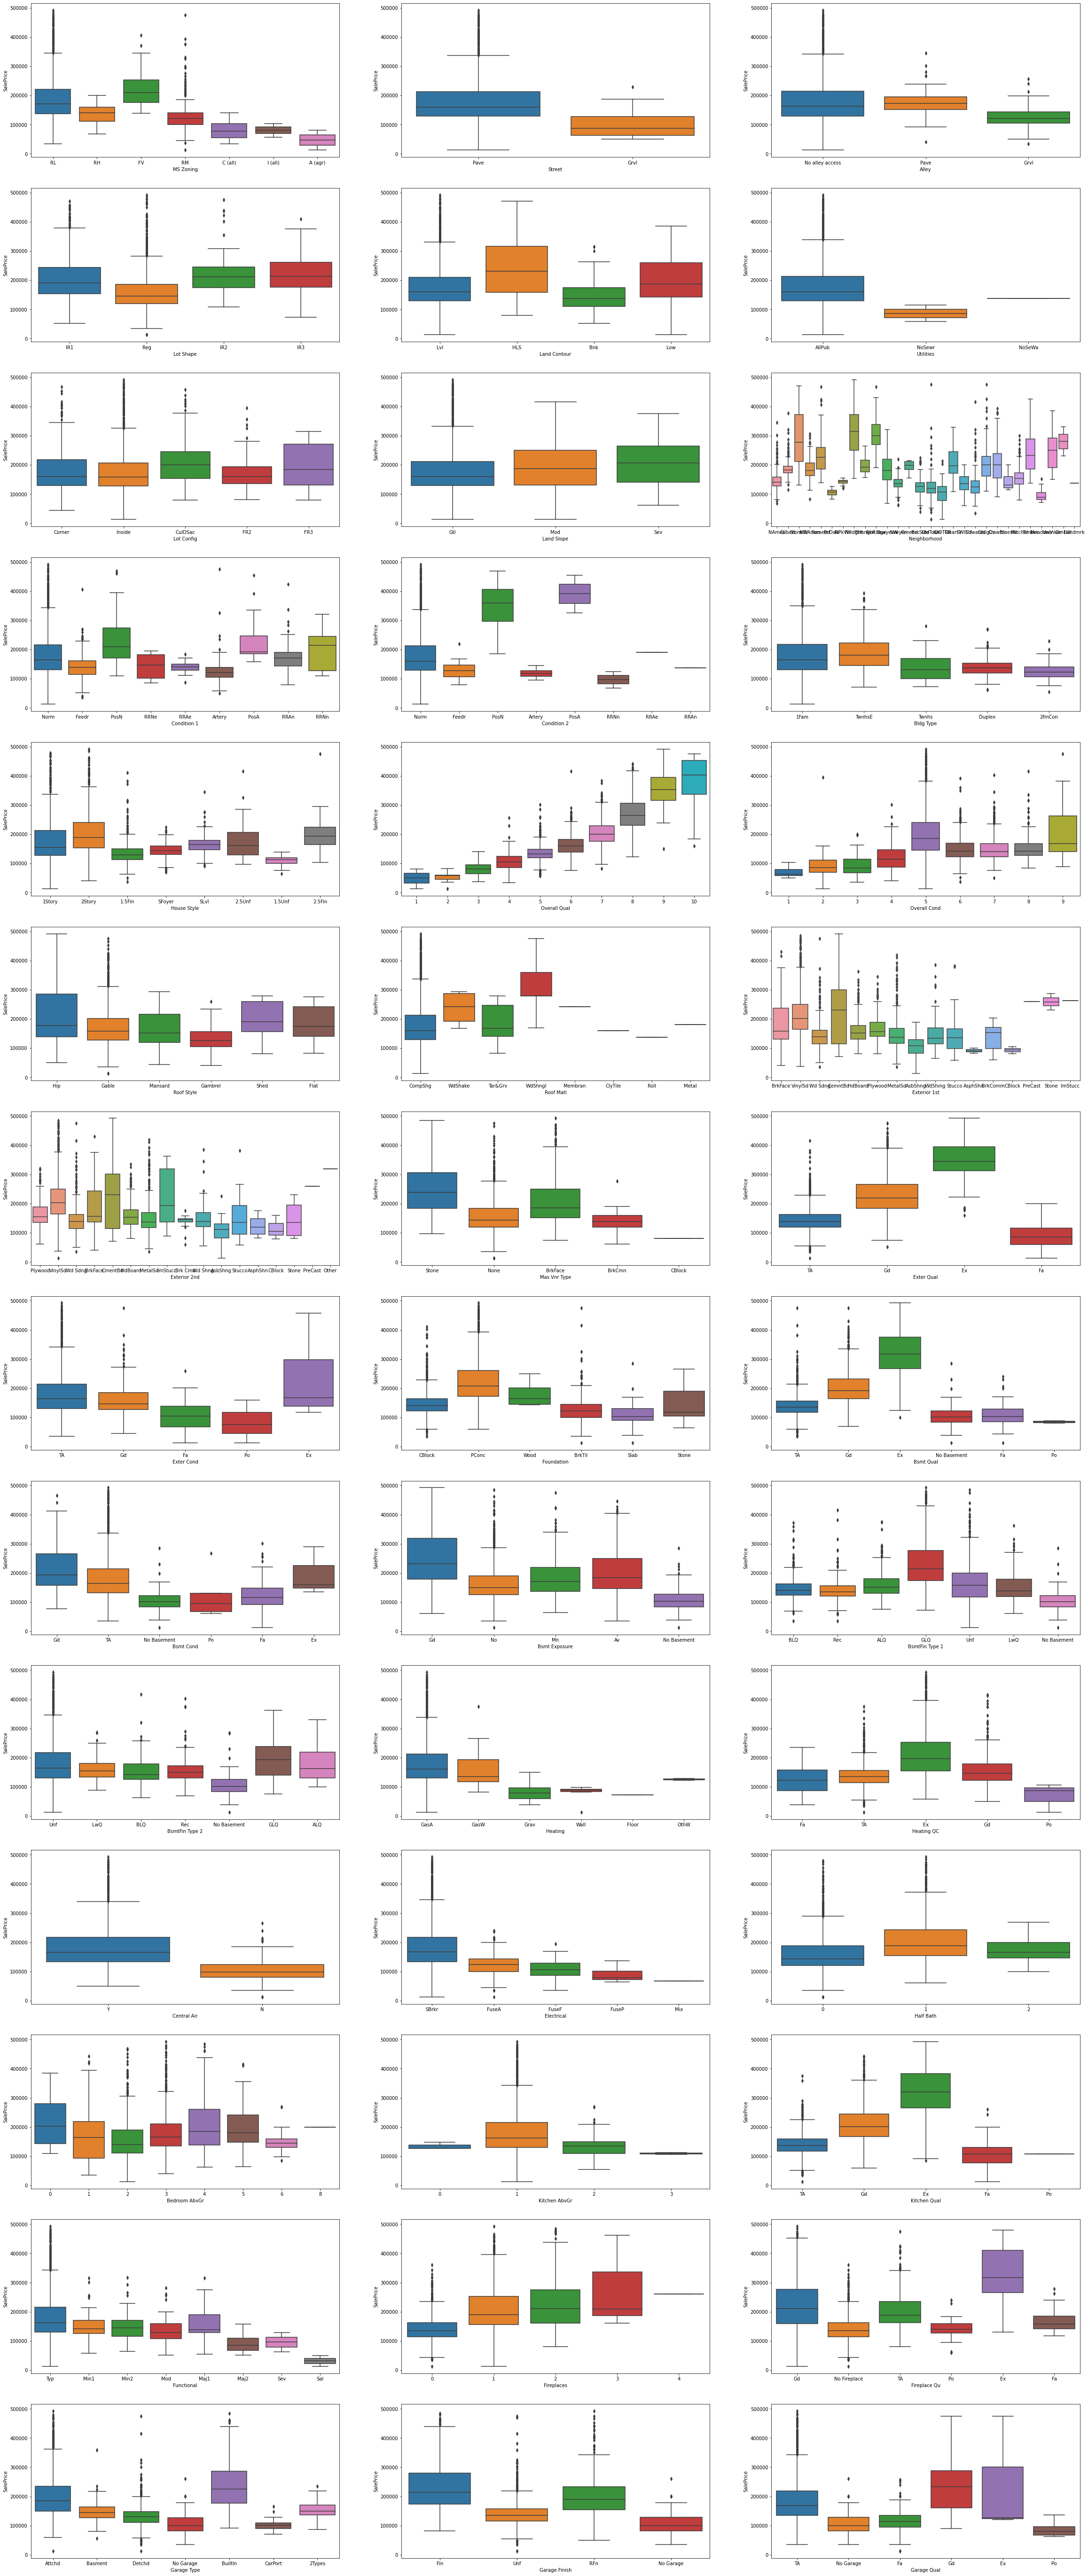

In [43]:
# create an empty list to store all the categorical variables
categorical=[]

# check the data type of each variable
for column in df_property:

    # check if the variable has the categorical type 
    if is_string_dtype(df_property[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40, 100))

# plot the boxplot for each categoric and target variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = variable, y = 'SalePrice', data = df_property, ax = subplot)
    
# display the plot
plt.show()

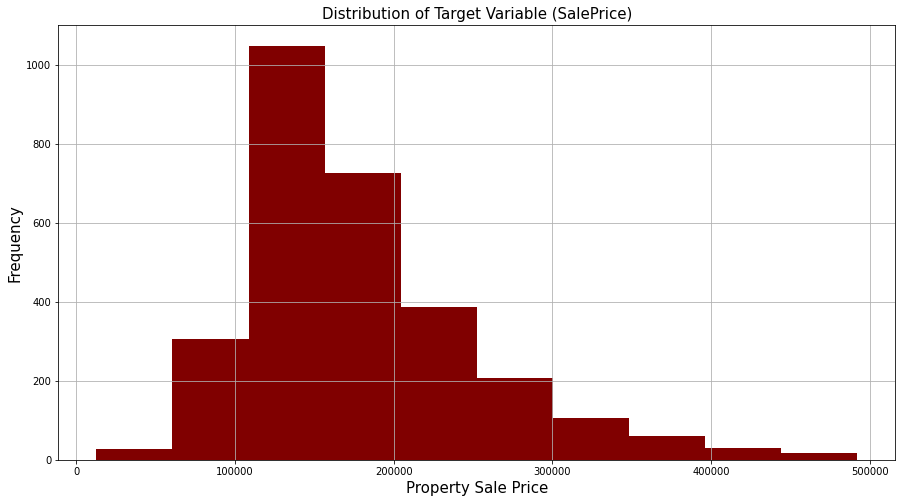

In [44]:
# check the distribution of target variable
df_property.SalePrice.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (SalePrice)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [45]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_property.SalePrice)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.914, p-value=0.000
The data is not normally distributed (reject H0)


In [46]:
# log transformation using np.log()
df_property['log_SalePrice'] = np.log(df_property['SalePrice'])

# display the top 5 rows of the data
df_property.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,log_SalePrice
0,526301100,20,RL,141.000,31770,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.000,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,TA,TA,P,210,62,0,0,0,No Fence,None,0,5,2010,WD,Normal,215000,12.278
1,526350040,20,RH,80.000,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,Unf,TA,TA,Y,140,0,0,0,120,MnPrv,None,0,6,2010,WD,Normal,105000,11.562
2,526351010,20,RL,81.000,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,Unf,TA,TA,Y,393,36,0,0,0,No Fence,Gar2,12500,6,2010,WD,Normal,172000,12.055
3,526353030,20,RL,93.000,11160,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.000,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,2110,0,0,2110,2,1,3,1,Ex,8,Typ,2,TA,Attchd,Fin,TA,TA,Y,0,0,0,0,0,No Fence,None,0,4,2010,WD,Normal,244000,12.405
4,527105010,60,RL,74.000,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,TA,TA,Y,212,34,0,0,0,MnPrv,None,0,3,2010,WD,Normal,189900,12.154


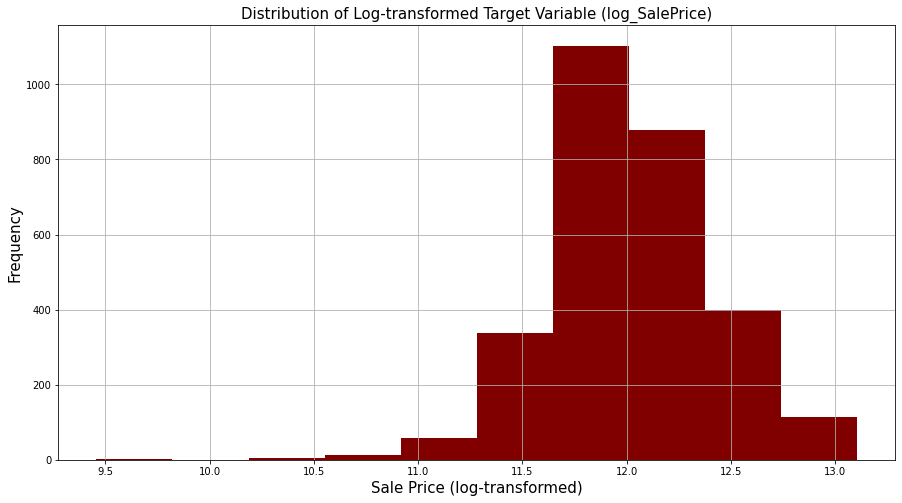

In [47]:
# recheck for normality 
# plot the histogram using hist
df_property.log_SalePrice.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log_SalePrice)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [48]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_property['log_SalePrice'])

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.986, p-value=0.000
The data is not normally distributed (reject H0)


In [49]:
# find the skewness of the variable log_SalePrice
df_property['log_SalePrice'].skew()

-0.1559066899382886

It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.

In [50]:
# filter out the categorical variables and consider only the numeric variables using (include=np.number)
df_numeric_features = df_property.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'log_SalePrice'],
      dtype='object')

In [51]:
# filter out the numerical variables and consider only the categorical variables using (include=object)
df_categoric_features = df_property.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type',
       'Sale Condition'],
      dtype='object')

In [52]:
# to create the dummy variables  we use 'get_dummies()' from pandas 
# to create (n-1) dummy variables we use 'drop_first = True' 
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [53]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_property_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_property_dummy.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,Mo Sold,Yr Sold,SalePrice,log_SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_No Basement,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_No Basement,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_No Basement,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_No Basement,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_No Basement,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Half Bath_1,Half Bath_2,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Kitchen AbvGr_1,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Func

In [54]:
# check the dimensions of the dataframe
df_property_dummy.shape

(2912, 291)

Linear regression Using Ols Method


In [55]:
# add the intercept column using 'add_constant()'
df_property_dummy = sm.add_constant(df_property_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
X = df_property_dummy.drop(['SalePrice','log_SalePrice'], axis = 1)

# extract the target variable from the data set
y = df_property_dummy[['SalePrice','log_SalePrice']]

# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2038, 290)
The shape of X_test is: (874, 290)
The shape of y_train is: (2038, 2)
The shape of y_test is: (874, 2)


In [56]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_logmodel_full = sm.OLS(y_train['log_SalePrice'], X_train).fit()

# print the summary output
print(linreg_logmodel_full.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     99.47
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:59:20   Log-Likelihood:                 1819.5
No. Observations:                2038   AIC:                            -3095.
Df Residuals:                    1766   BIC:                            -1566.
Df Model:                         271                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [57]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [58]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['SalePrice']

In [59]:
# calculate rmse using rmse()
linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [60]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25907.361,0.939,0.929


No log method

In [61]:
# build a OLS model using function OLS()
# Property_Sale_Price is our target variable
# use fit() to fit the model on train data
linreg_nolog_model = sm.OLS(y_train['SalePrice'], X_train).fit()

# print the summary output
print(linreg_nolog_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     89.31
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:59:22   Log-Likelihood:                -23001.
No. Observations:                2038   AIC:                         4.655e+04
Df Residuals:                    1766   BIC:                         4.807e+04
Df Model:                         271                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
# predict the 'Property_Sale_Price' using predict()
linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

In [63]:
# calculate rmse using rmse()
linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price, linreg_nolog_model_predictions)

# calculate R-squared using rsquared
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

In [64]:
# append the result table 
# compile the required information
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25907.361,0.939,0.929
1,Linreg full model without log of target variable,35718.864,0.932,0.922


Linear Regression Using VIF Variation Inflation Factor

In [65]:
# consider the independent variables in the dataframe 'df_property' 
# remove the target variables 'Property_Sale_Price' and 'log_Property_Sale_Price' using drop() function
df_property_features = df_property.drop(['SalePrice', 'log_SalePrice'], axis = 1)

# filter out the categorical variables and consider only the numerical variables using (include=np.number)
df_numeric_features_vif = df_property_features.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,Mo Sold,Yr Sold
0,526301100,20,141.000,31770,1960,1960,112.000,1656,0,0,1656,1,7,210,62,0,0,0,0,5,2010
1,526350040,20,80.000,11622,1961,1961,0.000,896,0,0,896,1,5,140,0,0,0,120,0,6,2010
2,526351010,20,81.000,14267,1958,1958,108.000,1329,0,0,1329,1,6,393,36,0,0,0,12500,6,2010
3,526353030,20,93.000,11160,1968,1968,0.000,2110,0,0,2110,2,8,0,0,0,0,0,0,4,2010
4,527105010,60,74.000,13830,1997,1998,0.000,928,701,0,1629,2,6,212,34,0,0,0,0,3,2010


In [66]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'reset_index' resets the index of the dataframe
# 'ascending = False' sorts the data in descending order
# 'drop = True' drops the index that was previously created
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,Gr Liv Area
1,inf,Low Qual Fin SF
2,inf,2nd Flr SF
3,inf,1st Flr SF
4,16057.389,Year Remod/Add
5,14293.572,Yr Sold
6,9785.851,Year Built
7,56.463,TotRms AbvGrd
8,19.368,Full Bath
9,18.013,PID


In [67]:
# we will calculate the VIF for each numerical variable
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of feature names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'vif_more_than_10' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    vif_more_than_10 = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'vif_more_than_10' is not empty, then sort the dataframe by VIF values
    # if dataframe 'vif_more_than_10' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor         Features
0        8.049              PID
1        3.138      MS SubClass
2        2.908         Lot Area
3        1.486     Mas Vnr Area
4        2.086       2nd Flr SF
5        1.023  Low Qual Fin SF
6        9.393        Full Bath
7        1.674     Wood Deck SF
8        1.655    Open Porch SF
9        1.217   Enclosed Porch
10       1.017       3Ssn Porch
11       1.099     Screen Porch
12       1.024         Misc Val
13       5.359          Mo Sold


In [68]:
# lets consider the variables obtained from VIF
# use the dummy variables created previously
# concatenate the numerical and dummy encoded categorical variables
df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,PID,MS SubClass,Lot Area,Mas Vnr Area,2nd Flr SF,Low Qual Fin SF,Full Bath,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,Mo Sold,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_No Basement,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_No Basement,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_No Basement,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_No Basement,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_No Basement,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Half Bath_1,Half Bath_2,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Kitchen AbvGr_1,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Fireplace Qu_Fa,Fireplace Qu_G

In [69]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# consider independent variables
# create a copy of 'df_dummy' and store it as X
X = df_dummy.copy()

# extract the target variable from the data set
y = df_property[['SalePrice','log_SalePrice']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (2038, 283)
The shape of X_test is: (874, 283)
The shape of y_train is: (2038, 2)
The shape of y_test is: (874, 2)


In [70]:
# build a full model using OLS()
# consider the target variable log_Property_Sale_Price 
# use fit() to fit the model on train data
linreg_vif_model = sm.OLS(y_train['log_SalePrice'], X_train).fit()

# print the summary output
print(linreg_vif_model.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     72.19
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:59:27   Log-Likelihood:                 1492.3
No. Observations:                2038   AIC:                            -2453.
Df Residuals:                    1772   BIC:                            -957.7
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [71]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

In [72]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['SalePrice']

In [73]:
# calculate rmse using rmse()
linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_vif_model_rsquared = linreg_vif_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

In [74]:
# append the accuracy scores to the table
# compile the required information
linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25907.361,0.939,0.929
1,Linreg full model without log of target variable,35718.864,0.932,0.922
2,Linreg with VIF,27768.965,0.915,0.903


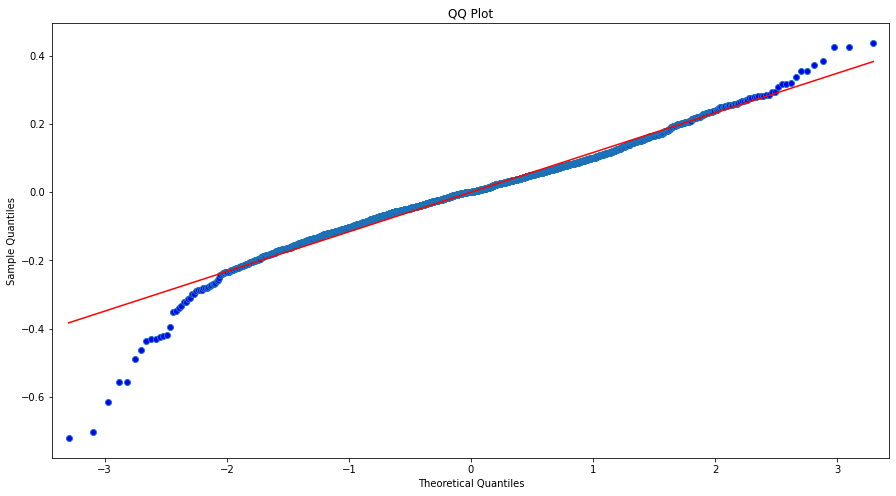

In [75]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(linreg_vif_model.resid).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')